In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image, ImageOps

In [2]:
import numpy as np
#import matplotlib.pyplot as plt # Correctly imports pyplot from matplotlib
import cv2
from PIL import Image, ImageOps

In [ ]:
# load image


In [11]:
# simple harris
# Sobel kernels
Sx = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

Sy = Sx.T

# Gaussian Kernel
G = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]])/16



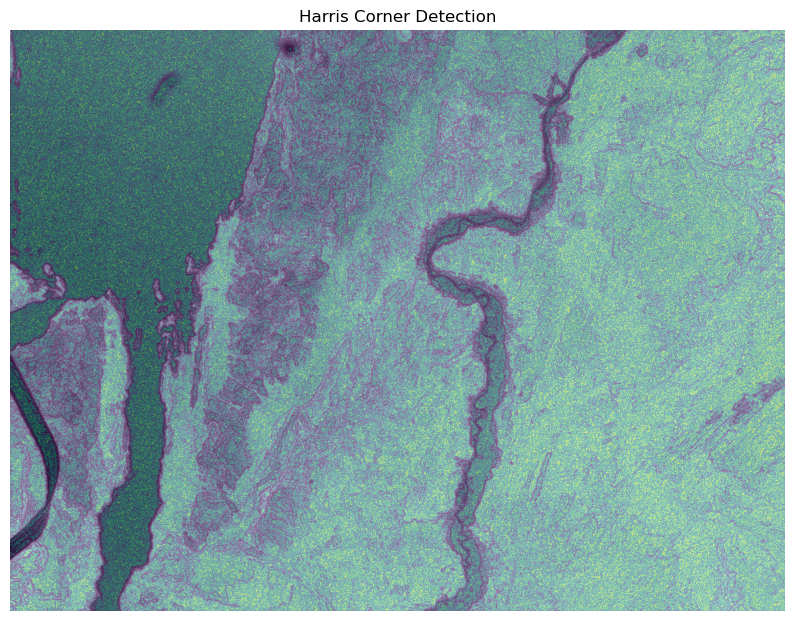

In [19]:
def corner_response(image, k, Sx=Sx, Sy=Sy, G=G):
    # compute first derivatives
    dx = cv2.filter2D(image, ddepth=-1, kernel=Sx)
    dy = cv2.filter2D(image, ddepth=-1, kernel=Sy)

    # Gaussian Filter (blur)
    A = cv2.filter2D(dx*dx, ddepth=-1, kernel=G)
    B = cv2.filter2D(dy*dy, ddepth=-1, kernel=G)
    C = cv2.filter2D(dx*dy, ddepth=-1, kernel=G)

    # compute corner response at all pixels
    return (A*B - (C*C)) - k*(A + B)*(A + B)

# hyperparameters
k = 0.05
thresh = 0.5

image = cv2.imread('earth_img\photo_090_53245597319_o.jpg', cv2.IMREAD_GRAYSCALE)

# thresholded corner responses
strong_corners = corner_response(image, k) > thresh

# plot
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.imshow(strong_corners, alpha=0.5)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


In [20]:
def get_harris_corners(image, k=k,Sx=Sx, Sy=Sy, G=G):

    # compute corner response
    R = corner_response(image, k, Sx=Sx, Sy=Sy, G=G)

    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(R > 1e-2))
    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    return cv2.cornerSubPix(image, np.float32(centroids), (9,9), (-1,-1), criteria)

In [21]:
from skimage.data import brick

image = brick().astype(np.float32)

# (OPTIONAL) blurr image --> This will change hyperparameters
# image = cv2.blur(image, ksize=(5,5))

# 0-1 normalize
image /= image.max()

# find corners
corners = get_harris_corners(image)

# draw corners on output image
image_out = np.dstack((image, image, image))
for (x, y) in corners:
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    cv2.circle(image_out, (x, y), radius=3, color=(0, 255, 0), thickness=-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


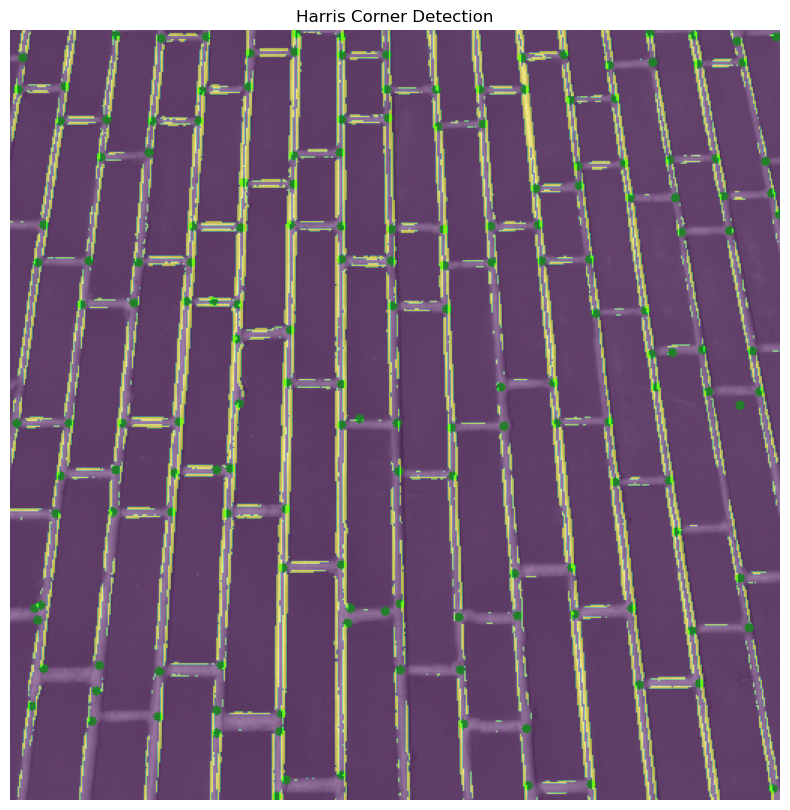

In [22]:
R = corner_response(image, k)
edge_response = R < -0.025

# plot
plt.figure(figsize=(10, 10))
plt.imshow(image_out)
plt.imshow(edge_response, alpha=0.5)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


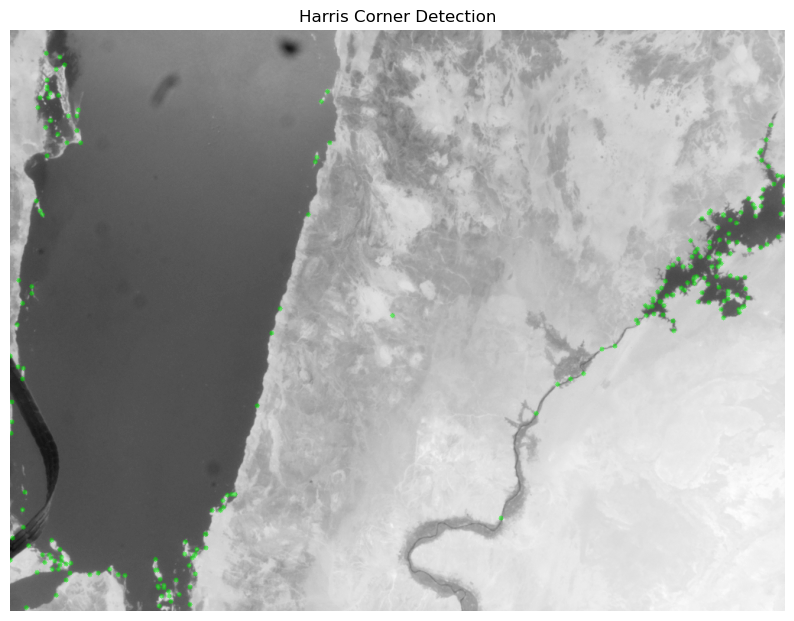

In [69]:
image = cv2.imread('earth_img\photo_092_53245529093_o.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32)

# downsample image
image = cv2.resize(image, (0, 0), fx=0.25, fy=0.25)

#resize image
#image = cv2.resize(image, (100, 100))

# (OPTIONAL) blurr image --> This will change hyperparameters
# image = cv2.blur(image, ksize=(5,5))



# 0-1 normalize
image /= image.max()


# find corners
corners = get_harris_corners(image)

# draw corners on output image
image_out = np.dstack((image, image, image))
for (x, y) in corners:
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    cv2.circle(image_out, (x, y), radius=3, color=(0, 255, 0), thickness=-1)

R = corner_response(image, k)
edge_response = R < -0.025

# plot
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.imshow(image_out, cmap='gray', alpha=0.5)
#plt.imshow(edge_response, alpha=0.5)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


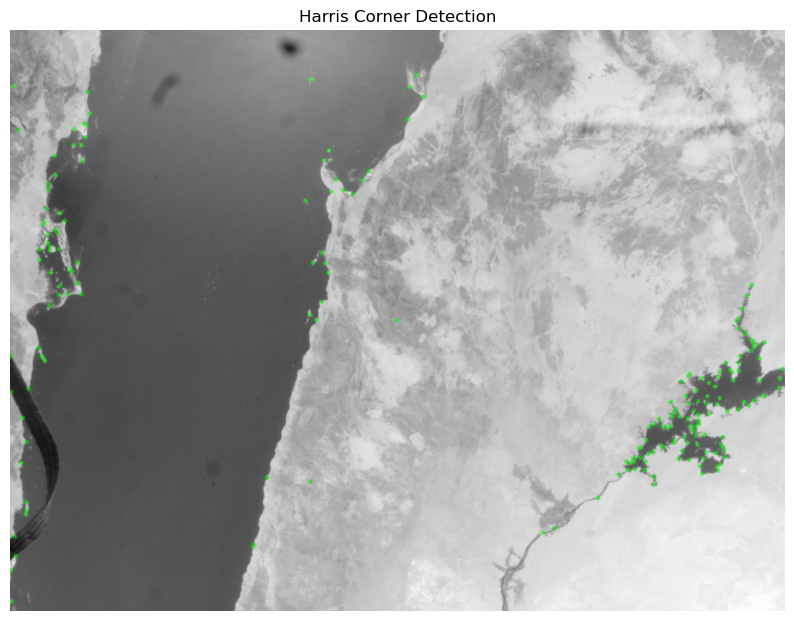

In [74]:
image_2 = cv2.imread('earth_img\photo_093_53244355532_o.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32)

# downsample image
image_2 = cv2.resize(image_2, (0, 0), fx=0.25, fy=0.25)

#normalize image
image_2 /= image_2.max()

# find corners
corners2 = get_harris_corners(image_2)

#print(corners)

# draw corners on output image

image2_out = np.dstack((image_2, image_2, image_2))

for (x, y) in corners2:

    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    cv2.circle(image2_out, (x, y), radius=3, color=(0, 255, 0), thickness=-1)

R = corner_response(image_2, k)
edge_response = R < -0.025

# plot
plt.figure(figsize=(10, 10))
plt.imshow(image_2, cmap='gray')
plt.imshow(image2_out, cmap='gray', alpha=0.5)
#plt.imshow(edge_esponse, alpha=0.5)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

# plt.figure(figsize=(10, 10))
# plt.imshow(image_2, cmap='gray')
# plt.imshow(image_out, cmap='gray', alpha=0.5)
# #plt.imshow(image2_out, cmap='gray', alpha=0.5)
# #plt.imshow(image_2, cmap='gray', alpha=0.5)
# plt.title('Harris Corner Detection')
# plt.axis('off')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


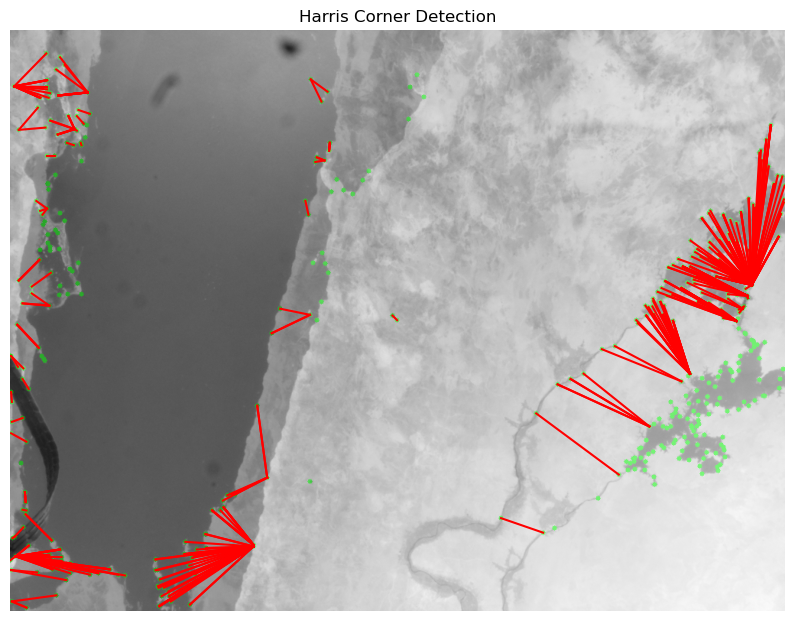

In [75]:
# match features
from scipy.spatial import distance

# compute pairwise distances between corners
distances = distance.cdist(corners, corners2)

# find the closest match for each corner
matches = np.argmin(distances, axis=1)

# plot
plt.figure(figsize=(10, 10))
plt.imshow(image_out, cmap='gray')
plt.imshow(image2_out, cmap='gray', alpha=0.5)
for i, (x, y) in enumerate(corners):
    x = np.round(x).astype(int)
    y = np.round(y).astype(int)
    x2, y2 = corners2[matches[i]]
    x2 = np.round(x2).astype(int)
    y2 = np.round(y2).astype(int)
    plt.plot([x, x2], [y, y2], color='r')
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

#from google.colab.patches import cv2_imshow

import matplotlib.image as mpimg
import os

"""Read Reference and Target images"""

target_image = cv2.imread('/earth_img\photo_090_53245597319_o.jpg')
reference_image = cv2.imread('/earth_img\photo_092_53245529093_o.jpg')

"""Convert Target and Reference Images to Grayscale"""

def convert_gray(target,references):
    target_rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
    r2_rgb = cv2.cvtColor(references, cv2.COLOR_BGR2RGB)
    target_gray = cv2.cvtColor(target_rgb, cv2.COLOR_RGB2GRAY)
    r2_gray = cv2.cvtColor(r2_rgb, cv2.COLOR_RGB2GRAY)
    return(target_gray,r2_gray)

target_img_gray,r2_img_gray =convert_gray(target_image,reference_image)

target_float = np.float32(target_img_gray)
r2_float = np.float32(r2_img_gray)

"""Harris-Corner Detection Algorithm"""

def HarrisCorner(target_float,r2_float):
    #Detect Corners
    corners_target = cv2.cornerHarris(target_float,2,3,0.04)
    corners_reference = cv2.cornerHarris(r2_float,2,3,0.04)
    corners_target = cv2.dilate(corners_target, None)
    target_image[corners_target>0.01*corners_target.max()] = [0,0,255]
    corners_reference = cv2.dilate(corners_reference, None)
    reference_image[corners_reference>0.01*corners_reference.max()] = [0,0,255]
    
    #Get Keypoints from Corners detected by Harris-Corner Detection
    keypoints_target = [cv2.KeyPoint(float(x[1]),float(x[0]), 20) for x in corners_target]
    keypoints_reference = [cv2.KeyPoint(float(x[1]),float(x[0]), 20) for x in corners_reference]

    return keypoints_target,keypoints_reference

kp_target, kp_reference = HarrisCorner(target_float,r2_float)

"""ORB FEATURE MATCHING"""

orb = cv2.ORB_create()
kp1,des1 = orb.compute(target_img_gray,kp_target,None)
kp2,des2 = orb.compute(r2_img_gray,kp_target,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
print(len(matches))
target_matches = cv2.drawMatches(target_img_gray, kp1, r2_img_gray, kp2, matches[:20], None, flags=2)
cv2_imshow( target_matches)
cv2.waitKey(0)